# Time Series Forecasting with the Air Passengers Dataset

This notebook demonstrates a time-series prediction task using the Air Passengers dataset.  
We will:
- Load and preprocess the data.
- Visualize the time series.
- Prepare data sequences for model training.
- Build and train a simple LSTM model.
- Evaluate the model using Mean Absolute Error (MAE) as a metric.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
!pip install pandas numpy matplotlib tensorflow kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pattnaiksatyajit/air-passengers")

print("Path to dataset files:", path)

100%|██████████| 764/764 [00:00<00:00, 463kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/pattnaiksatyajit/air-passengers/versions/1


In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv(path + "/AirPassengers.csv")
print(df.columns.to_list())
# Convert the 'Month' column to datetime and set as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Ensure the 'Passengers' column is numeric
df['#Passengers'] = pd.to_numeric(df['#Passengers'], errors='coerce')

# Display the first few rows of the DataFrame
print(df.head())

['Month', '#Passengers']
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


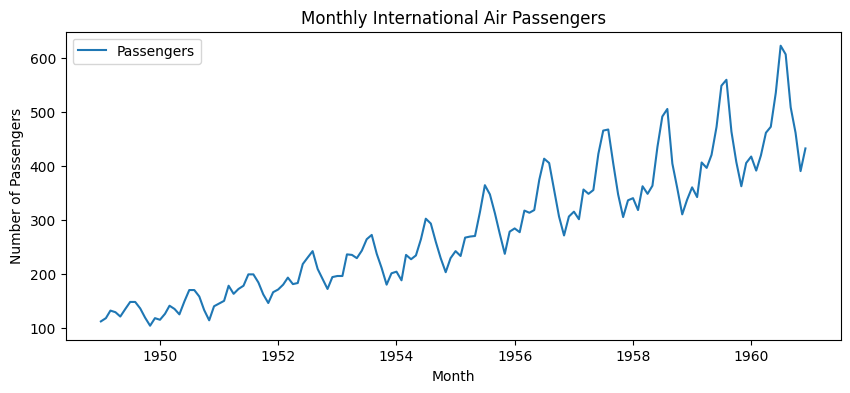

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['#Passengers'], label="Passengers")
plt.title("Monthly International Air Passengers")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

In [ ]:
# Extract the time series values
data = df['#Passengers'].values
data = data.reshape(-1, 1)

# Define sequence parameters
sequence_length = 12  # Use the past 12 months to predict the next month
batch_size = 1

# Create training sequences
generator = TimeseriesGenerator(data, data,
                                length=sequence_length, batch_size=batch_size)

print(f"Number of samples: {len(generator)}")

Number of samples: 132


In [ ]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 50
history = model.fit(generator, epochs=epochs, verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 79852.3281 - mae: 234.1388
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 12480.3457 - mae: 81.6549
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 13446.4629 - mae: 86.0027
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8922.8154 - mae: 68.4784
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6126.5171 - mae: 58.4637
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 12700.9482 - mae: 74.7734
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5698.0781 - mae: 56.1455
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5438.5142 - mae: 56.6668
Epoch 9/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3689.2141 - mae: 43.2819
Epoch 10/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5885.6372 - mae: 53.6085
Epoch 11/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4704.5679 - mae: 52.7990
Epoch 12/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4442.281

Training History:
            loss         mae
1   38302.945312  147.626099
2   14044.250977   87.942459
3   12271.515625   81.548973
4   10149.254883   74.841499
5    6259.054688   55.189735
6    9943.450195   70.832550
7    6134.771484   58.291256
8    4939.708984   53.268318
9    4874.366699   49.007614
10   5431.029785   53.654804
11   4904.186035   53.956375
12   5581.425781   55.065140
13   4946.004883   51.002285
14   4528.774414   48.355125
15   2820.350830   41.991188
16   4380.002930   49.977863
17   4848.157227   53.093010
18   5977.492188   54.084545
19   6445.417480   56.515228
20   6335.086426   61.081127
21   4160.653809   48.284164
22   6041.217285   55.671120
23   3693.843750   45.864693
24   5516.927734   54.485577
25   7003.973145   64.873428
26  28202.287109  134.518127
27   8590.019531   69.759315
28   4800.491211   55.679665
29   5248.501465   53.423206
30   4751.375977   51.362385
31   3905.503662   46.682953
32   4309.870605   50.135010
33   5288.609375   54.988

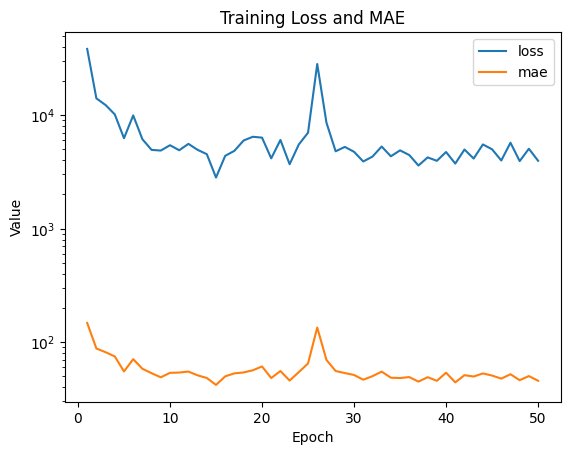

In [ ]:
import pandas as pd

# Convert history to a DataFrame
history_df = pd.DataFrame(history.history)
history_df.index += 1  # Adjust epoch numbering starting from 1

print("Training History:")
print(history_df)

# Plot the loss and MAE
history_df[['loss', 'mae']].plot(title="Training Loss and MAE", xlabel="Epoch", ylabel="Value", logy=True)
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


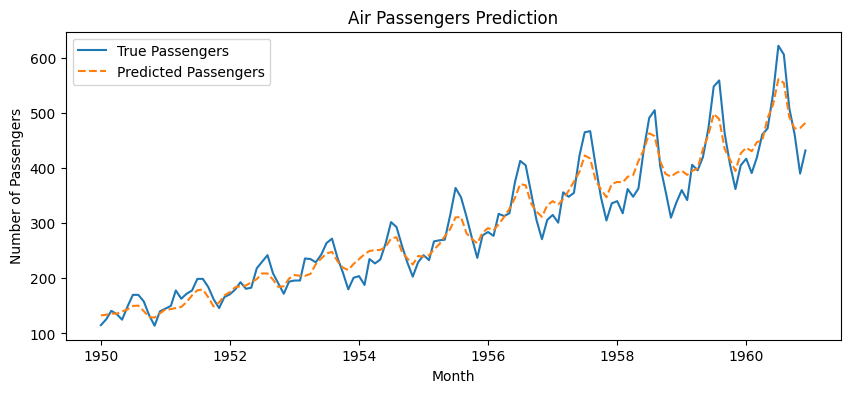

In [ ]:
# Make predictions using the generator
predictions = model.predict(generator)

# Since generator creates sequences, get the corresponding true values (next month after each sequence)
true_values = data[sequence_length:]

# Create a time index for predictions (aligned with the true values)
prediction_index = df.index[sequence_length:]

plt.figure(figsize=(10, 4))
plt.plot(prediction_index, true_values, label="True Passengers")
plt.plot(prediction_index, predictions, label="Predicted Passengers", linestyle='--')
plt.title("Air Passengers Prediction")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()